In [5]:
from common.path import *
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure', figsize=(10, 7))

In [70]:
all_cases = pd.read_parquet(PROCESSED_DATA_DIR / 'casos.parquet')
all_cases.dropna(subset=['cad_dt_notificacao', 'dg_covid'], inplace=True)

# Perguntas descritivas

## 1. Quantos casos de SRAG houveram em cada ano?

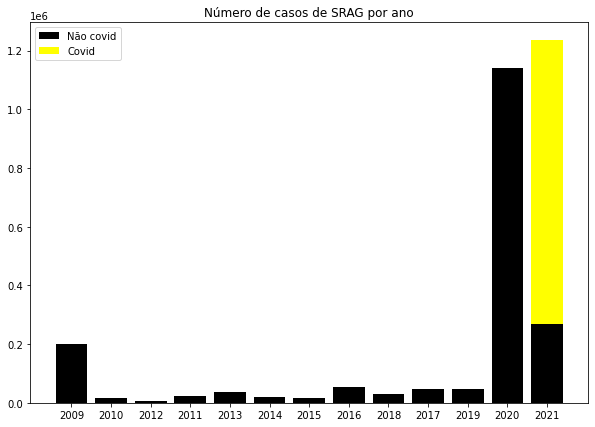

In [80]:
if True:
    non_covid_cases = all_cases[all_cases.dg_covid == 0]
    true_covid_cases = all_cases[all_cases.dg_covid == 1]

    x = all_cases.cad_dt_notificacao.dt.strftime('%Y').unique()
    y0 = non_covid_cases.groupby(all_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()
    y1 = pd.concat([pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]), true_covid_cases.groupby(all_cases.cad_dt_notificacao.dt.strftime('%Y')).size()]).to_numpy()

    plt.bar(x, y0, color='black', label='Não covid')
    plt.bar(x, y1, bottom=y0, color='yellow', label='Covid')

    plt.title("Número de casos de SRAG por ano")
    plt.legend()
    plt.show() 

In [79]:
PANDEMIC_DAY_ZERO = '2020-02-06'
unvaccinated_pre_pandemic = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao < PANDEMIC_DAY_ZERO)]
non_covid_post_pandemic = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao >= PANDEMIC_DAY_ZERO)]